/home/justin/.cache/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-o9xq_4ux because there was an issue with the default path (/home/justin/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


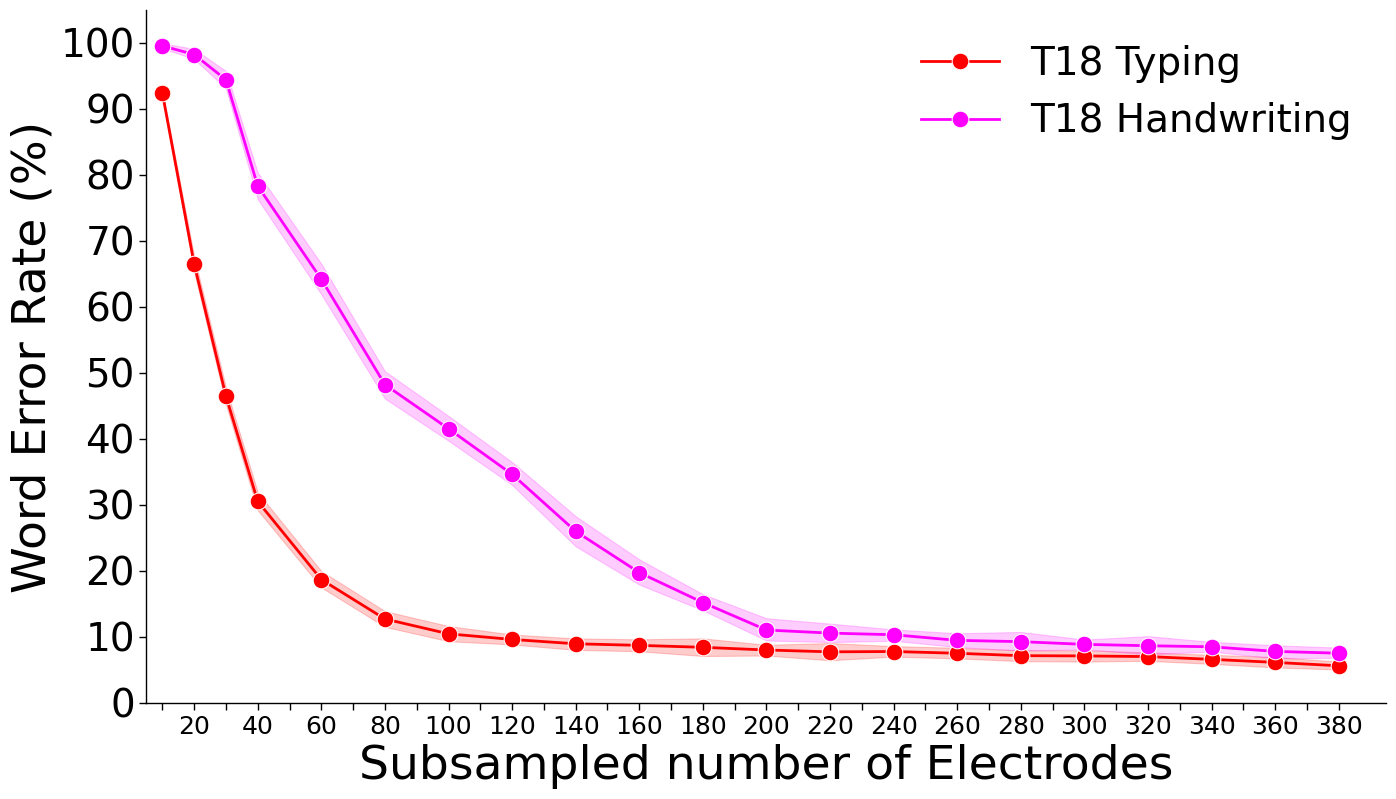

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
all_electrode_num = [10,20,30,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380]

all_postLM_wers = []
data_frame = []
plt.rcParams["figure.figsize"] = (16 ,9)
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":34, 'legend.fontsize': 28, 'lines.markersize':9})  

for electrode_num in all_electrode_num:
    electrode_all = []
    for seed in range(40):
        postLM_wers = np.load('T18 Typing Channel Subsampling/T18TrainTyping-Electrodes-' + str(electrode_num) + '-Seed-'+str(seed)+ '-WERPostLM.npy')
        electrode_all.append(postLM_wers)
        for trial in range(postLM_wers.shape[0]):
            data_frame.append([int(electrode_num), 'T18 Typing', int(postLM_wers[trial]*100)])
    
for electrode_num in all_electrode_num:
    electrode_all = []
    for seed in range(40):
        postLM_wers = np.load('T18 Handwriting Channel Subsampling/T18TrainHandwriting-Electrodes-' + str(electrode_num) + '-Seed-'+str(seed)+'-WERPostLM.npy')
        electrode_all.append(postLM_wers)
        for trial in range(postLM_wers.shape[0]):
            data_frame.append([int(electrode_num), 'T18 Handwriting', int(postLM_wers[trial]*100)])
df = pd.DataFrame(data_frame, columns=['Subsampled number of Electrodes', 'Participant', 'Word Error Rate (%)'])

flatui = ['red', 'magenta']
sns.set_palette(flatui)

g = sns.lineplot(x='Subsampled number of Electrodes', y='Word Error Rate (%)', hue='Participant', marker='o',markersize=12, data=df, linewidth=2,err_style='band', errorbar=('ci', 95))
sns.despine()
plt.gca().legend().set_title('')

plt.xlim([5, 395])
plt.ylim([0, 105])
plt.legend(frameon=False)
g.xaxis.set_major_locator(ticker.MultipleLocator(10))
g.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(fontsize=18, ticks = np.arange(10, 390, 10), labels=['',20,'',40,'',60,'',80,'',100,'',120,'',140,'',160,'',180,'',200,'',220,'',240,'',260,'',280,'',300,'',320,'',340,'',360,'',380])
plt.yticks(fontsize=28)

plt.savefig('T18TypingHandwritingSubsamplingElectrodesComparison.pdf', bbox_inches='tight')
plt.show()